In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from matplotlib import pyplot
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import shutil
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install packages inside requirements.txt

import torch
import utils
display = utils.notebook_init()  # Used to display predictions

YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images #runs python script detect.py on images inside data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 267MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 73.2ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 69.0ms
Speed: 0.7ms pre-process, 71.1ms inference, 213.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


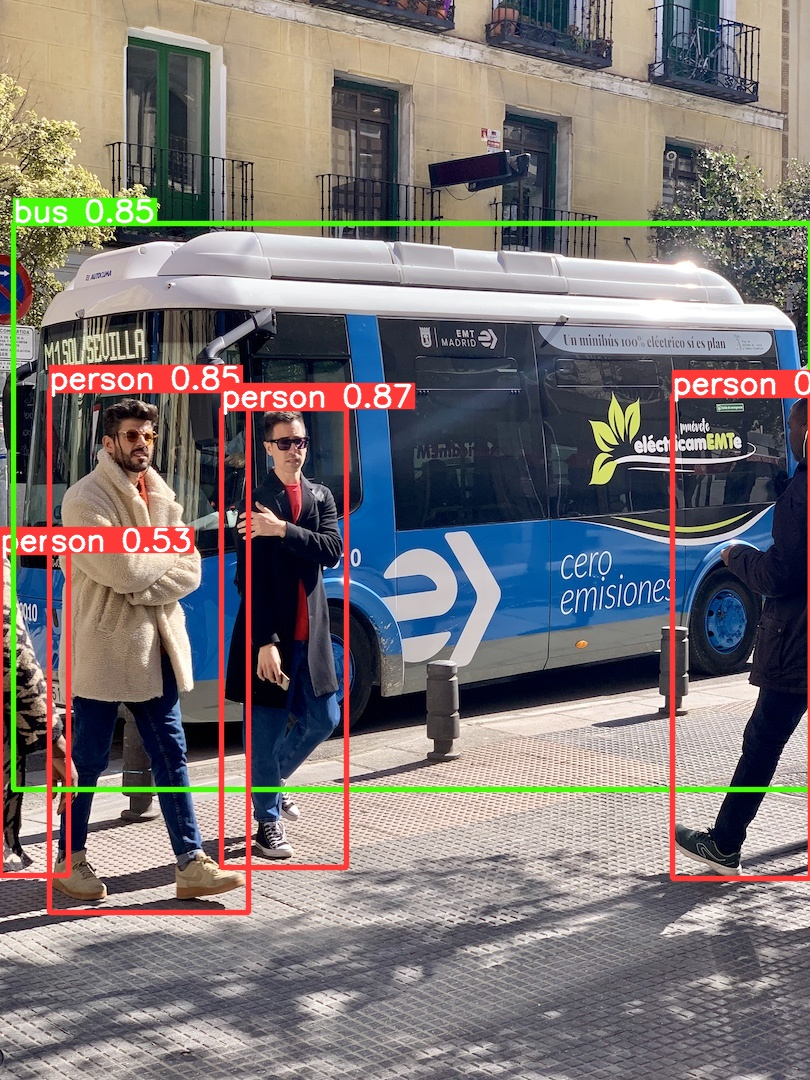

In [ ]:
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

# Using roboflow for training custom data
The following cell downloads the dataset in yolov5 format

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4kAHvP6NbWWXSUJVZ3MN")
project = rf.workspace("finalprojectinmind").project("wheel-dolly-detection")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=9b3a912e2ff7ff6d6be16ddb92e5e1a7c7ad3b8204597642ae8bb967d0ef971d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Wheel-dolly-detection-1 in yolov5pytorch:: 100%|██████████| 410/410 [00:00<00:00, 3115.62it/s]


In [ ]:
!python train.py --img 640 --batch 8 --epochs 16 --data /content/yolov5/Wheel-dolly-detection-1/data.yaml --weights yolov5s.pt --cache #training the model

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Wheel-dolly-detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=16, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

In [ ]:
!cp /content/yolov5/Wheel-dolly-detection-1/train/images/training_images_take_7_280_png.rf.7cc348e31e296ff0ac453d5e8132db9f.jpg /content/yolov5/data/images

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.7 --source data/images

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolov5/data/images/bus.jpg: 640x480 (no detections), 40.6ms
image 2/3 /content/yolov5/data/images/training_images_take_7_280_png.rf.7cc348e31e296ff0ac453d5e8132db9f.jpg: 640x640 1 Dolly, 2 Wheels, 11.6ms
image 3/3 /content/yolov5/data/images/zidane.jpg: 384x640 (no detections), 45.9ms
Speed: 0.5ms pre-process, 32.7ms inference, 34.7ms

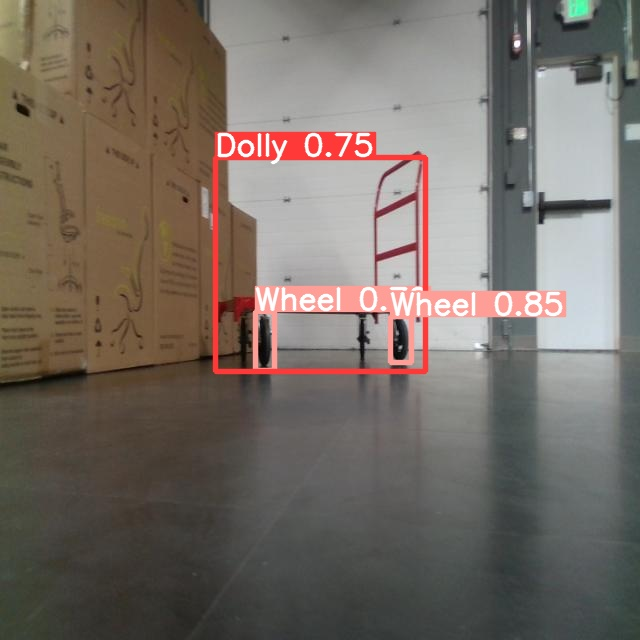

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp2/training_images_take_7_280_png.rf.7cc348e31e296ff0ac453d5e8132db9f.jpg', width=600)

In [ ]:
!python val.py --data /content/yolov5/Wheel-dolly-detection-1/data.yaml --weights runs/train/exp/weights/best.pt --img 640  #perform validation on our model

val: data=/content/yolov5/Wheel-dolly-detection-1/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/Wheel-dolly-detection-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.16it/s]
                   all         40        174      0.991      0.987      0.994      0.699
                 Dolly         40         40      0.997          1      0.995

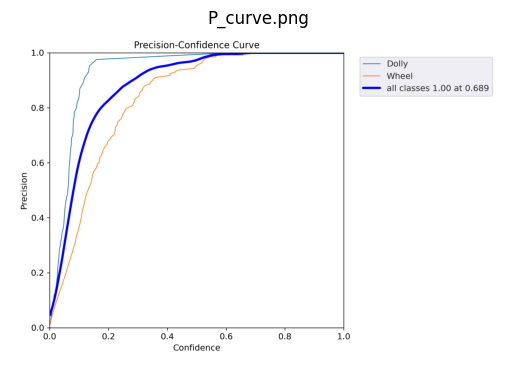

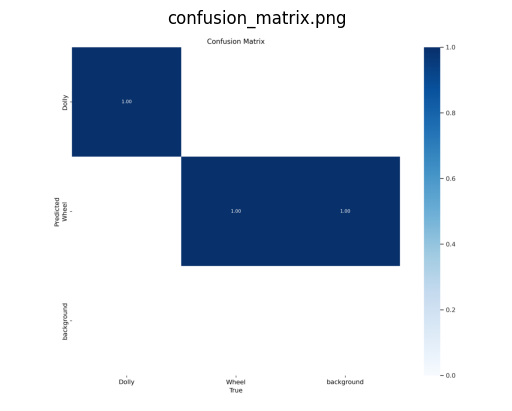

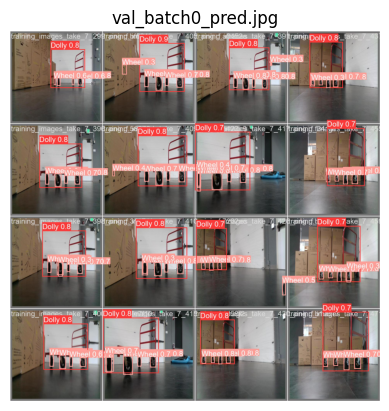

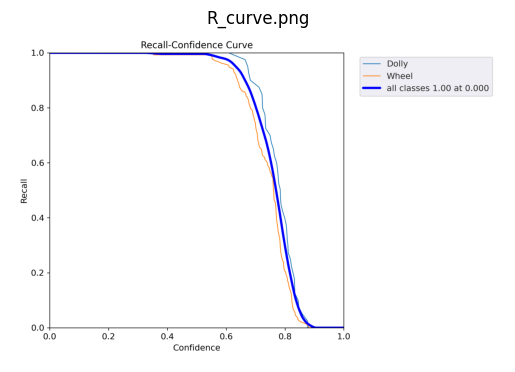

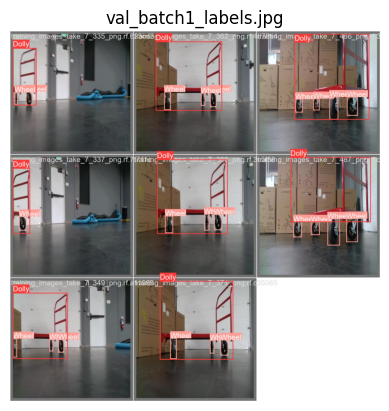

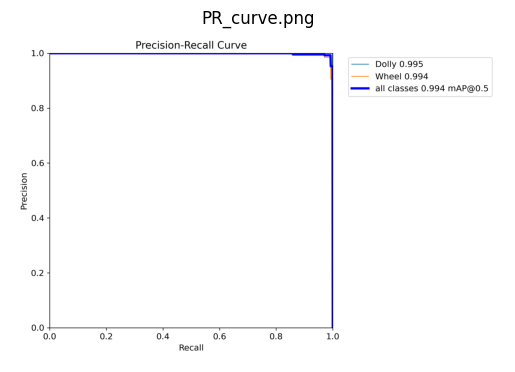

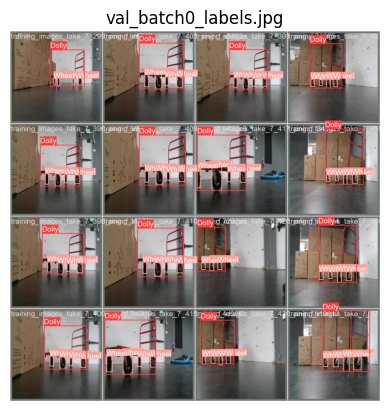

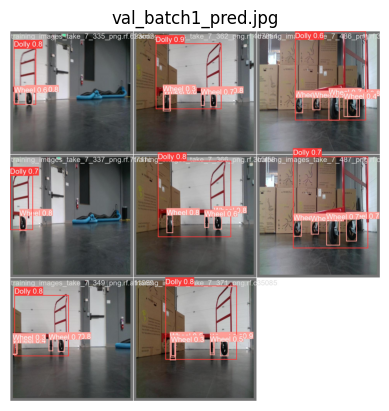

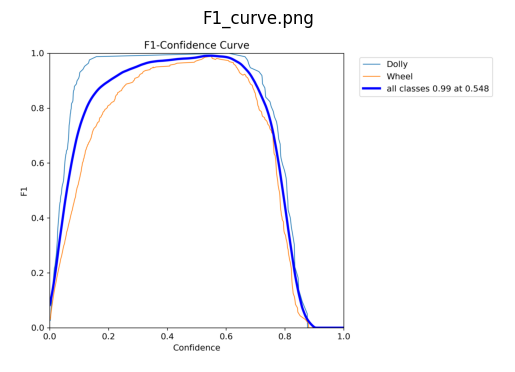

In [ ]:
val_exp_path = "/content/yolov5/runs/val/exp"
images = [img for img in os.listdir(val_exp_path) if img.endswith(".jpg") or img.endswith(".png")]

for image_name in images:
    image_path = os.path.join(val_exp_path, image_name)
    img = mpimg.imread(image_path)
    plt.figure()
    plt.title(image_name)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

## Med yolov5

In [ ]:
!python train.py --img 640 --batch 8 --epochs 16 --data /content/yolov5/Wheel-dolly-detection-1/data.yaml --weights yolov5s.pt --cache --hyp /content/yolov5/data/hyps/hyp.scratch-med.yaml #trainign on different hyper params

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Wheel-dolly-detection-1/data.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-med.yaml, epochs=16, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0

In [ ]:
!python val.py --data /content/yolov5/Wheel-dolly-detection-1/data.yaml --weights runs/train/exp2/weights/best.pt --img 640

val: data=/content/yolov5/Wheel-dolly-detection-1/data.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/Wheel-dolly-detection-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:02<00:00,  1.33s/it]
                   all         40        174      0.913      0.981      0.961      0.646
                 Dolly         40         40      0.995          1      0.99

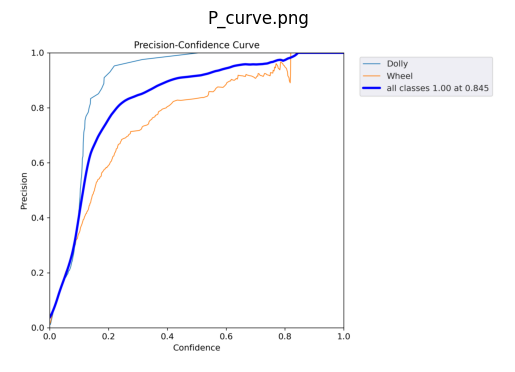

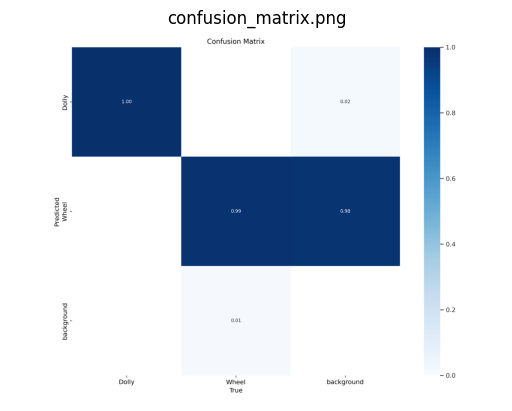

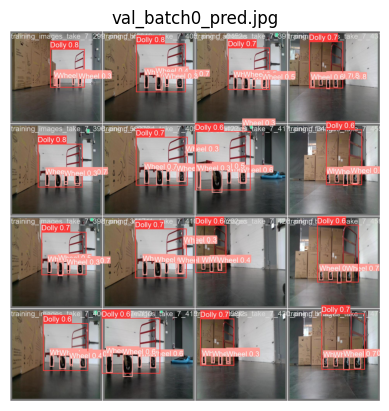

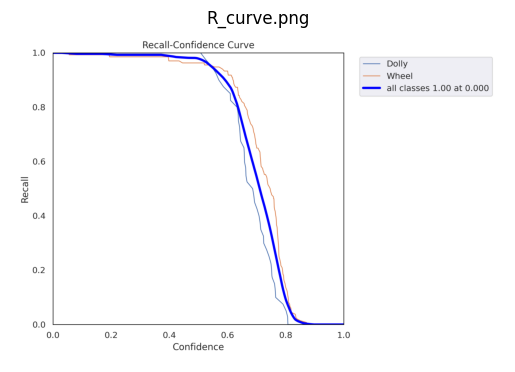

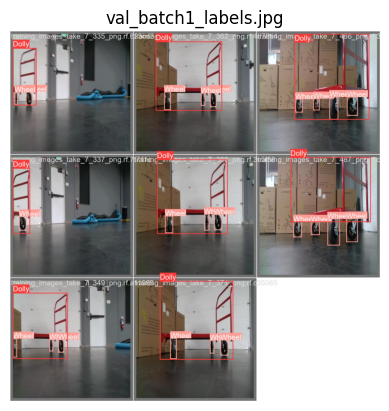

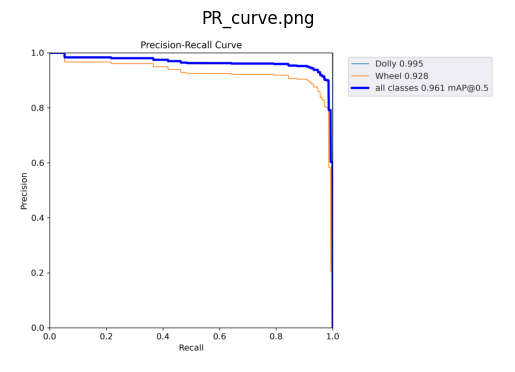

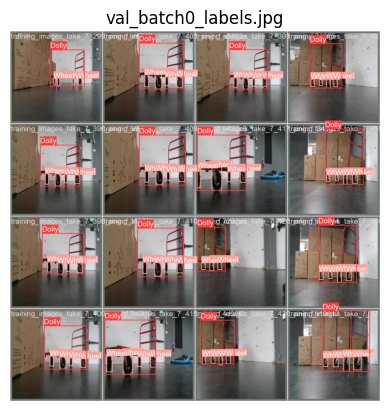

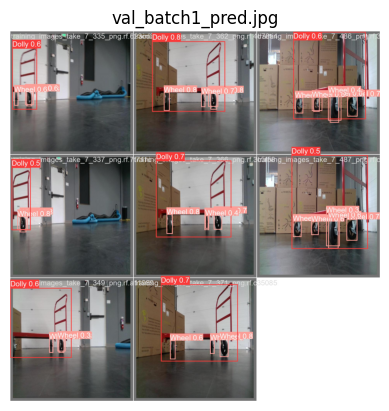

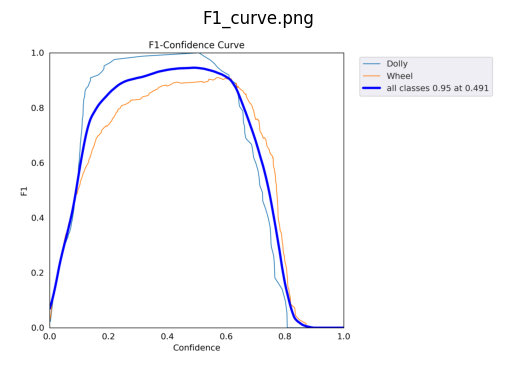

In [ ]:
val_exp2_path = "/content/yolov5/runs/val/exp2"
images = [img for img in os.listdir(val_exp2_path) if img.endswith(".jpg") or img.endswith(".png")]

for image_name in images:
    image_path = os.path.join(val_exp2_path, image_name)
    img = mpimg.imread(image_path)
    plt.figure()
    plt.title(image_name)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# The differences in these hyperparameters indicate that the low configuration likely aims for a more cautious training approach with lower learning rates, higher emphasis on classification loss. On the other hand, the med configuration appears to be more aggressive with higher learning rates, slightly lower emphasis on classification loss.

In [ ]:
!python yolov5/export.py --weights ./yolov5/runs/train/exp/weights/best.pt --img-size 640 --batch-size 1 --dynamic --optimize --simplify
